In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
import statsmodels.api as sm

In [7]:
temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
temp_city = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv')
#temp_state = pd.read_csv('GlobalLandTemperaturesByState.csv')
temp_global = pd.read_csv('GlobalTemperatures.csv', infer_datetime_format=True, index_col='dt', parse_dates=['dt'])

In [8]:
indian_cities = {'Ahmadabad', 'Bangalore' , 'Bombay' , 'Kanpur', 'Lakhnau', 'Nagpur', 'Madras','Pune', 'Calcutta' , 'Surat', 'New Delhi', 'Jaipur', 'Hyderabad'}

In [9]:
temp_global.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
temp_global.shape

(3192, 8)

In [11]:
temp_global.columns

Index(['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [12]:
print (temp_global.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8)
memory usage: 224.4 KB
None


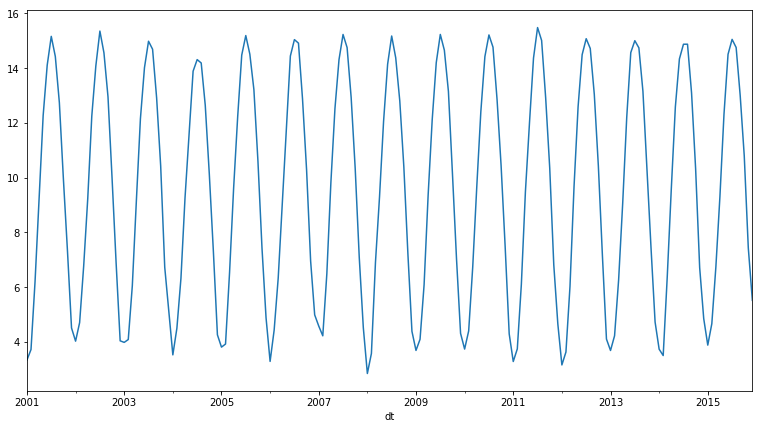

In [13]:
temp_global[temp_global.index.year > 2000]['LandAverageTemperature'].plot(figsize=(13,7))

The oscillation basically depicts the seasonal variance in average temperature - To gain a better insight let's try grouping the average temperature by year and plotting the average temperature change over years.

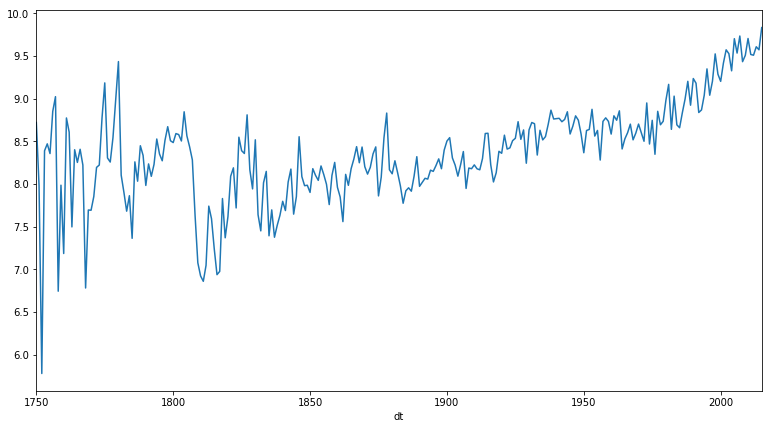

In [14]:
temp_global.groupby(temp_global.index.year)['LandAverageTemperature'].mean().plot(figsize=(13,7))

That seems about correct. I'm guessing the instruments we had in the early years had huge uncertainty, which is why we see the data in the initial years with large variation - as seen in below plot. Anyways bottom line is the average temperature has gradually increased over the year as seen in the plot.

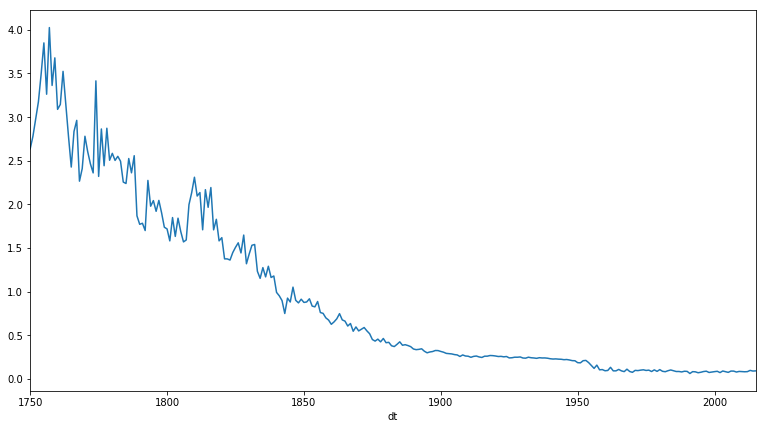

In [15]:
temp_global.groupby(temp_global.index.year)['LandAverageTemperatureUncertainty'].mean().plot(figsize=(13,7))

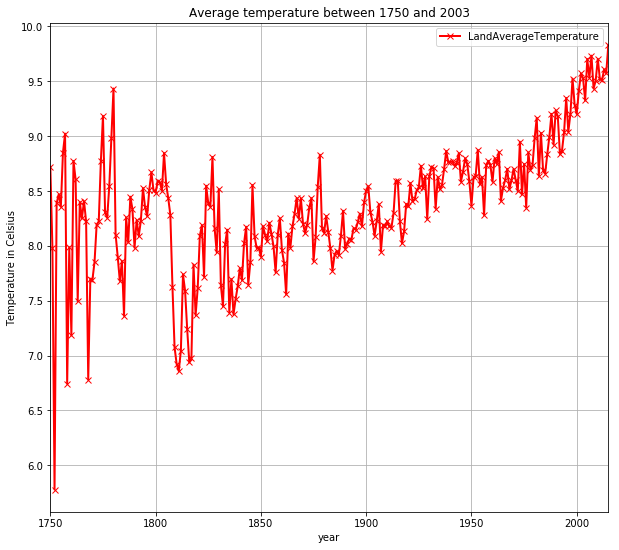

In [16]:
plt.figure (figsize = (10, 9))
temperature_by_year = temp_global.groupby(temp_global.index.year).mean()
temperature_by_year.LandAverageTemperature.plot(linewidth=2, color='red',marker='x')
plt.title('Average temperature between 1750 and 2003')
plt.xlabel('year')
plt.ylabel('Temperature in Celsius')
plt.legend()
plt.grid()

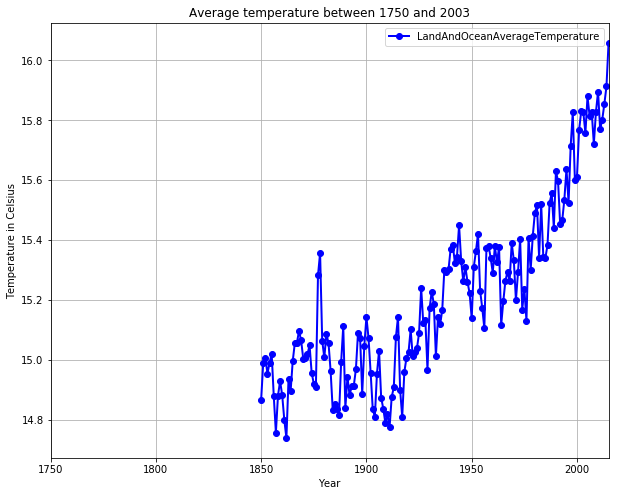

In [17]:
plt.figure (figsize = (10, 8))
temperature_by_year = temp_global.groupby(temp_global.index.year).mean()
temperature_by_year.LandAndOceanAverageTemperature.plot(linewidth=2, color='blue',marker='o')

plt.title('Average temperature between 1750 and 2003')
plt.xlabel('Year')
plt.ylabel('Temperature in Celsius')
plt.legend()
plt.grid()

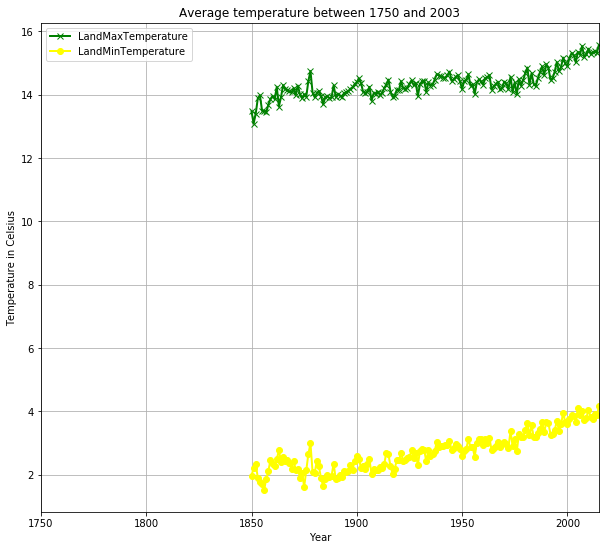

In [18]:
plt.figure (figsize = (10, 9))
temperature_by_year = temp_global.groupby(temp_global.index.year).mean()
temperature_by_year.LandMaxTemperature.plot(linewidth=2, color='green',marker='x')
temperature_by_year.LandMinTemperature.plot(linewidth=2, color='yellow',marker='o')
plt.title('Average temperature between 1750 and 2003')
plt.xlabel('Year')
plt.ylabel('Temperature in Celsius')
plt.legend()
plt.grid()

In [19]:
avt = temp_global.LandAndOceanAverageTemperature
missing_dates = avt[avt.isnull() == True]
print(missing_dates.tail())

dt
1849-08-01   NaN
1849-09-01   NaN
1849-10-01   NaN
1849-11-01   NaN
1849-12-01   NaN
Name: LandAndOceanAverageTemperature, dtype: float64


In [20]:
recent = temp_global.LandAndOceanAverageTemperature["1850":]
recent.isnull().sum()

0

Text(0, 0.5, 'Average Temperature')

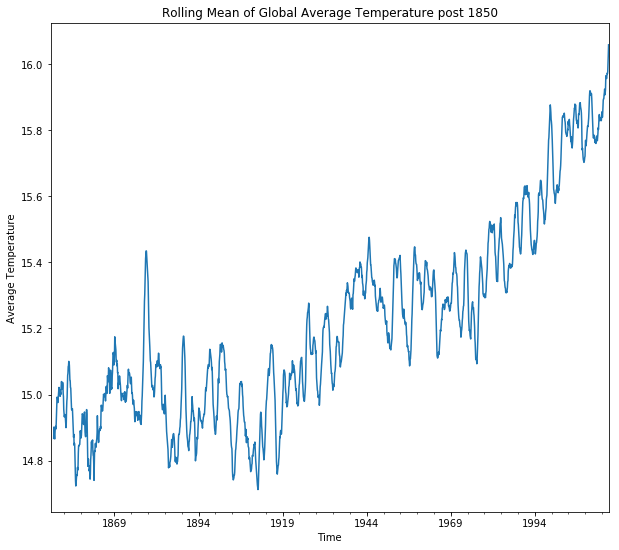

In [21]:
var = recent.rolling(12).std()
mean = recent.rolling(12).mean()
plt.figure (figsize = (10, 9))
mean.plot()
plt.title("Rolling Mean of Global Average Temperature post 1850")
plt.xlabel("Time")
plt.ylabel("Average Temperature")

Text(0, 0.5, 'Average Temperature')

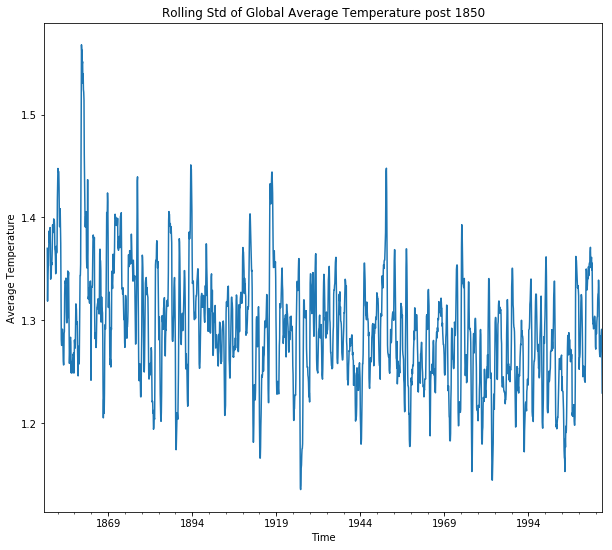

In [22]:
plt.figure (figsize = (10, 9))
var.plot()
plt.title("Rolling Std of Global Average Temperature post 1850")
plt.xlabel("Time")
plt.ylabel("Average Temperature")

In [23]:
# drop unnecessary columns
temp_city = temp_city[['dt', 'City', 'AverageTemperature']]

temp_city['dt'] = pd.to_datetime(temp_city['dt'])
temp_city['year'] = temp_city['dt'].map(lambda x: x.year)
temp_city['month'] = temp_city['dt'].map(lambda x: x.month)
temp_city['City'] = temp_city['City']

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = temp_city['year'].min()
max_year = temp_city['year'].max()
years = range(min_year, max_year + 1)

temp_city['season'] = temp_city['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = temp_city[temp_city['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['AverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['AverageTemperature'].mean())

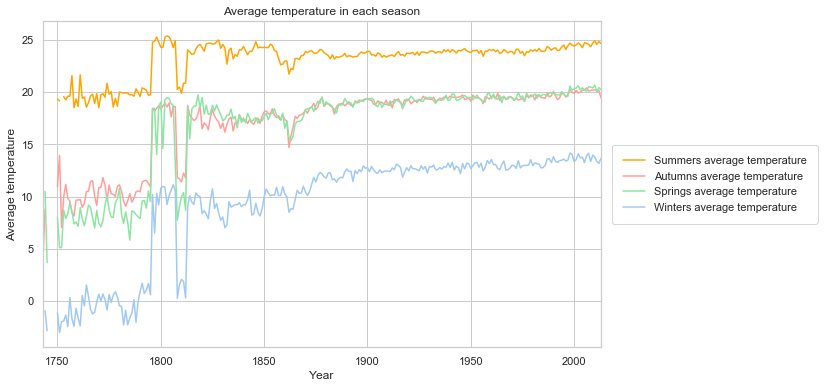

In [24]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

In [25]:
cities = temp_city['City'].unique()

indian_cities = {'Ahmadabad', 'Bangalore' , 'Bombay' , 'Kanpur', 'Lakhnau', 'Nagpur', 'Madras','Pune', 'Calcutta' , 'Surat', 'New Delhi', 'Jaipur', 'Hyderabad'}

In [26]:
temp_city.columns

Index(['dt', 'City', 'AverageTemperature', 'year', 'month', 'season'], dtype='object')

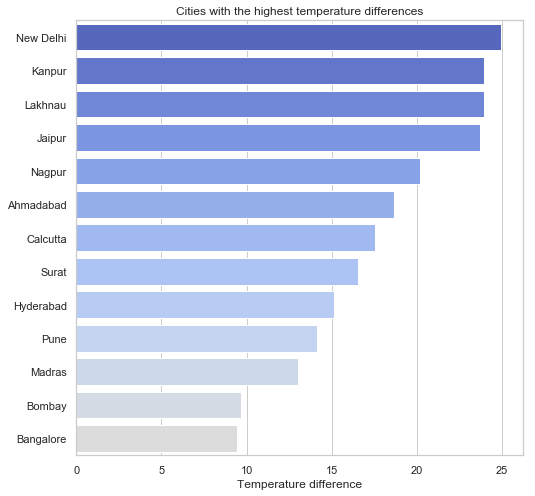

In [27]:
city_list = []
min_max_list = []

# getting max and min temps
for city in cities:
    if (city in indian_cities):
        ##print(city)
        curr_temps = temp_city[temp_city['City'] == city]['AverageTemperature']
        curr_temps_uncertain = temp_city[temp_city['City'] == city]['AverageTemperature']
        min_max_list.append((curr_temps.max(), curr_temps.min()))
        city_list.append(city)
    
# nan cleaning
res_min_max_list = []
res_cities = []

for i in range(len(min_max_list)):
    if not np.isnan(min_max_list[i][0]):
        res_min_max_list.append(min_max_list[i])
        res_cities.append(city_list[i])

# calc differences        
differences = []

for tpl in res_min_max_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting
differences, res_cities = (list(x) for x in zip(*sorted(zip(differences, res_cities), key=lambda pair: pair[0], reverse=True)))

# ploting cities with temperature difference
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:15], y=res_cities[:14], palette=sns.color_palette("coolwarm", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", title="Cities with the highest temperature differences")

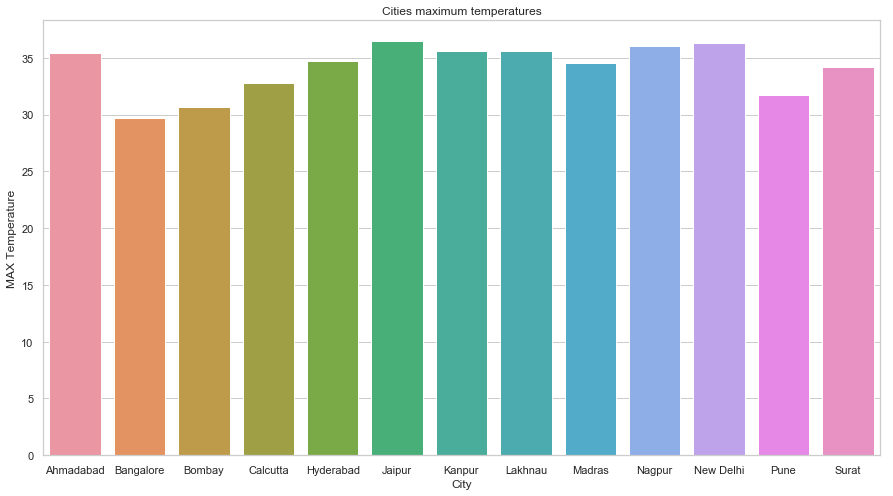

In [28]:
min_max_majorcity = pd.DataFrame(temp_city)

max_majorcity = min_max_majorcity.groupby(['City']).max()['AverageTemperature']
max_majorcity = max_majorcity.to_frame().reset_index()
max_majorcity.columns = ['City','City Maximum']
max_majorcity = max_majorcity.loc[max_majorcity['City'].isin(indian_cities)]

f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='City',y='City Maximum', data=max_majorcity.reset_index())
texts = ax.set(ylabel="MAX Temperature", xlabel="City", title="Cities maximum temperatures")

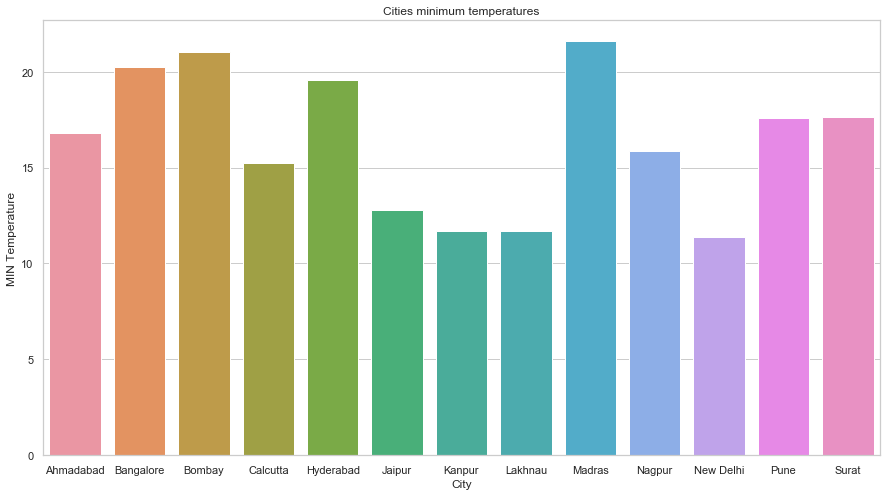

In [29]:
min_majorcity = min_max_majorcity.groupby(['City'],as_index=True).min()['AverageTemperature']
min_majorcity = min_majorcity.to_frame().reset_index()
min_majorcity.columns = ['City','City Minimum']
##print(min_majorcity)
min_majorcity = min_majorcity.loc[min_majorcity['City'].isin(indian_cities)]

f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='City',y='City Minimum', data=min_majorcity.reset_index())
texts = ax.set(ylabel="MIN Temperature", xlabel="City", title="Cities minimum temperatures")

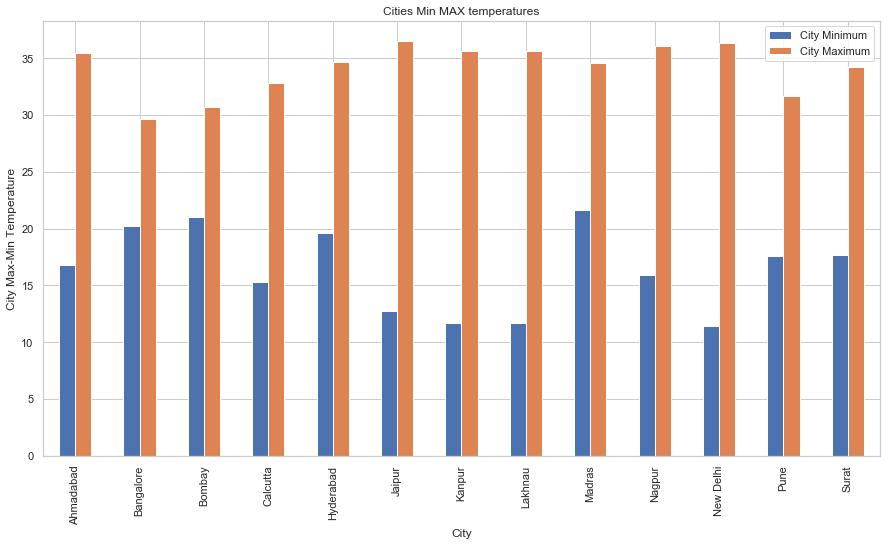

In [30]:
##Merging the two data sets
min_max_majorcity_merge = pd.merge(min_majorcity , max_majorcity)
min_max_majorcity_merge = min_max_majorcity_merge.set_index('City')
##print(min_max_majorcity_merge)

ax = min_max_majorcity_merge.plot(kind='bar',stacked=False, figsize=(15, 8))

texts = ax.set(ylabel="City Max-Min Temperature", xlabel="City", title="Cities Min MAX temperatures")

Test Statistic                -1.179241e+01
p-value                        9.755605e-22
#Lags Used                     2.500000e+01
Number of Observations Used    1.965000e+03
Critical Value (1%)           -3.433682e+00
Critical Value (5%)           -2.863012e+00
Critical Value (10%)          -2.567554e+00
dtype: float64


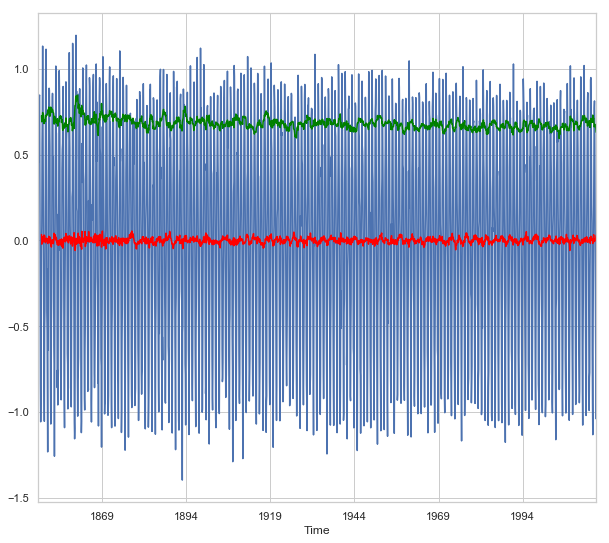

In [31]:
diff = recent.diff().dropna()
mean_diff = diff.rolling(12).mean()
var_diff = diff.rolling(12).std()
plt.figure (figsize = (10, 9))
diff.plot()
mean_diff.plot(c = "red")
var_diff.plot(c = "green")
plt.xlabel("Time")
dftest = sm.tsa.adfuller(diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

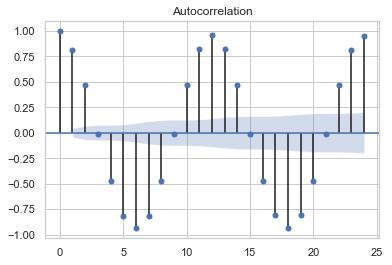

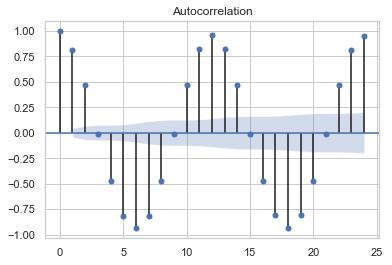

In [32]:
###Check out the ACF and PACF
sm.tsa.graphics.plot_acf(diff,lags = np.arange(0,25,1))

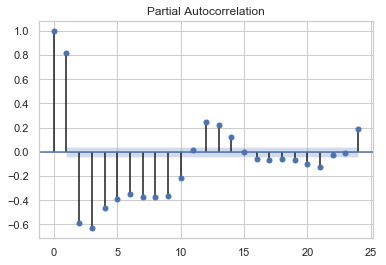

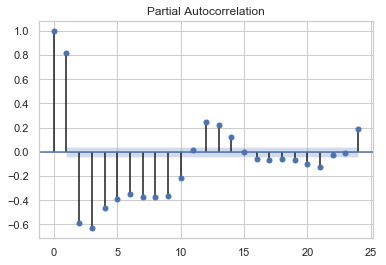

In [33]:
sm.tsa.graphics.plot_pacf(diff,lags=np.arange(0,25,1))

In [34]:
mod = sm.tsa.SARIMAX(recent,order = (3,1,0), seasonal_order=(0,0,0,12)).fit()
mod.summary()

C:\Users\C5291022\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\C5291022\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:     LandAndOceanAverageTemperature   No. Observations:                 1992
Model:                           SARIMAX(3, 1, 0)   Log Likelihood                  30.816
Date:                            Sun, 24 May 2020   AIC                            -53.631
Time:                                    23:00:26   BIC                            -31.246
Sample:                                01-01-1850   HQIC                           -45.410
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9223      0.016     58.616      0.000       0.891       0.953
ar.L2          0.2317      0.023     10.153      0.000       0.187       0.276
ar.L3         -0.6316      0.016    -39.602      0.000      -0.663      -0.600
sigma2         0.0567      0.002     34.903      0.000       0.053       0.060
===================================================================================
Ljung-Box (Q):                      752.68   Jarque-Bera (JB):                45.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

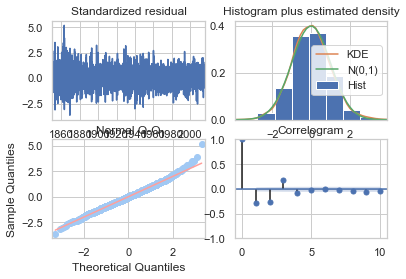

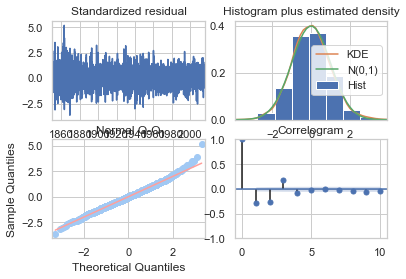

In [35]:
mod.plot_diagnostics()